<a href="https://colab.research.google.com/github/NewCodeLearner/NLP_Implementations/blob/main/01_data_acquisition_and_data_augumentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Pipeline: Data Acquisition, Augmentation and Labelling

In this notebook , we'll understand 3 main components of NLP pipeline.


1.   Data Acquisition
2.   Augumentation
3.   Labelling


# 1. Data Acquisition

## 1.1 Text Extraction from Images & PDFs

Explore practical implementations:
1. Learn how to leverage Tika for extracting text from PDF documents, with code examples demonstrating error handling and text cleanup
2. Using OCR (tesseract-ocr) for extracting text from images

In [ ]:
!pip install tika

In [ ]:
# Import the parser from the tika module
from tika import parser

def extract_text_from_pdf(pdf_path):
    """
    Extracts text content from a PDF file using Apache Tika.

    Parameters:
        pdf_path (str): Path to the PDF file.

    Returns:
        str: Extracted text content from the PDF.
    """
    try:
        # Parse data from file
        parsed_pdf = parser.from_file(pdf_path)

        # Extract text content
        text = parsed_pdf.get("content", "")

        # Check if any text was extracted
        if text:
            return text.strip()
        else:
            return "No text could be extracted from the file."
    except Exception as e:
        return f"An error occurred: {e}"

if __name__ == "__main__":
    # Path to your PDF file; change this to the location of your PDF file. Make sure to upload the pdf file in google colab if running from Google Colab.
    pdf_file_path = "attention.pdf"

    # Extract text from the PDF file
    extracted_text = extract_text_from_pdf(pdf_file_path)

    # Print the extracted text
    print("Extracted Text:")
    print(extracted_text[0:1000]) # print first 1000 words.
   #print(extracted_text) # print full text.

Extracted Text:
Provided proper attribution is provided, Google hereby grants permission to
reproduce the tables and figures in this paper solely for use in journalistic or

scholarly works.

Attention Is All You Need

Ashish Vaswani∗
Google Brain

avaswani@google.com

Noam Shazeer∗
Google Brain

noam@google.com

Niki Parmar∗
Google Research

nikip@google.com

Jakob Uszkoreit∗
Google Research
usz@google.com

Llion Jones∗
Google Research

llion@google.com

Aidan N. Gomez∗ †

University of Toronto
aidan@cs.toronto.edu

Łukasz Kaiser∗
Google Brain

lukaszkaiser@google.com

Illia Polosukhin∗ ‡

illia.polosukhin@gmail.com

Abstract

The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks that include an encoder and a decoder. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer,
based solely on attention mechanisms, dispensing with recurr

Text Extraction from Images

In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 30 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 7s (692 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debcon

The pytesseract library acts as a Python wrapper for the Tesseract-OCR engine, making it easier to interact with Tesseract directly from Python. While the Tesseract-OCR library itself is a standalone tool for Optical Character Recognition (OCR), pytesseract provides a convenient way to integrate Tesseract's functionality into Python-based projects.

In [ ]:
!pip install pytesseract

In [ ]:
import pytesseract
from pytesseract import image_to_string
from PIL import Image

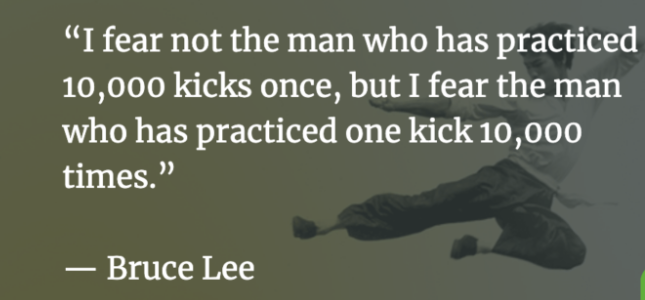

In [ ]:
image0=Image.open('/content/quote.png')
image0

In [ ]:
image_path="quote.png"
extractedInformation = image_to_string(Image.open(image_path))
extractedInformation

'“T fear not the man who has practiced\n10,000 kicks once, but I fear the man\nwho has practiced one kick 10,000\nTubee( oma\n\n— Bruce Lee\n\x0c'

## 1.2 Web Scraping & HTML Parsing

A step-by-step walkthrough of how to use Beautiful Soup for extracting and cleaning data from HTML content. Learn about handling server restrictions by mimicking web browser requests.

In [ ]:
!pip install numpy==1.19.5
!pip install beautifulsoup4==4.6.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 30.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for numpy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for numpy
Failed to build numpy
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (numpy)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.13.3
    Uninstalling beautifulsoup4-4.13.3:
      Successfully uninstalled beautifulsoup4-4.13.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This be

In [ ]:
from pprint import pprint
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests

In [ ]:
myurl = "https://stackoverflow.com/questions/415511/how-to-get-the-current-time-in-python" # specify the url

# Use requests to fetch the HTML content, adding headers to mimic a browser
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'
}

response = requests.get(myurl, headers=headers )
html = response.content  # Get the content of the response

soupified = BeautifulSoup(html, 'html.parser') # parse the html in the 'html' variable, and store it in Beautiful Soup format


In [ ]:
print(soupified.prettify()[:2000]) # to get an idea of the html structure of the webpage

<!DOCTYPE html>
<html class="html__responsive " itemscope="" itemtype="https://schema.org/QAPage" lang="en">
 <head>
  <title>
   datetime - How do I get the current time in Python? - Stack Overflow
  </title>
  <link href="https://cdn.sstatic.net/Sites/stackoverflow/Img/favicon.ico?v=ec617d715196" rel="shortcut icon"/>
  <link href="https://cdn.sstatic.net/Sites/stackoverflow/Img/apple-touch-icon.png?v=c78bd457575a" rel="apple-touch-icon"/>
  <link href="https://cdn.sstatic.net/Sites/stackoverflow/Img/apple-touch-icon.png?v=c78bd457575a" rel="image_src"/>
  <link href="/opensearch.xml" rel="search" title="Stack Overflow" type="application/opensearchdescription+xml"/>
  <link href="https://stackoverflow.com/questions/415511/how-do-i-get-the-current-time-in-python" rel="canonical">
   <meta content="width=device-width, height=device-height, initial-scale=1.0, minimum-scale=1.0" name="viewport"/>
   <meta content="website" property="og:type">
    <meta content="https://stackoverflow.com/

In [ ]:
soupified.title

<title>datetime - How do I get the current time in Python? - Stack Overflow</title>

In [ ]:
question = soupified.find("div", {"class": "question"}) # find the nevessary tag and class which it belongs to
questiontext = question.find("div", {"class": "s-prose js-post-body"})
print("Question: \n", questiontext.get_text().strip())

answer = soupified.find("div", {"class": "answer"}) # find the nevessary tag and class which it belongs to
answertext = answer.find("div", {"class": "s-prose js-post-body"})
print("Best answer: \n", answertext.get_text().strip())

Question: 
 How do I get the current time in Python?
Best answer: 
 Use datetime:
>>> import datetime
>>> now = datetime.datetime.now()
>>> now
datetime.datetime(2009, 1, 6, 15, 8, 24, 78915)
>>> print(now)
2009-01-06 15:08:24.789150

For just the clock time without the date:
>>> now.time()
datetime.time(15, 8, 24, 78915)
>>> print(now.time())
15:08:24.789150


To save typing, you can import the datetime object from the datetime module:
>>> from datetime import datetime

Then remove the prefix datetime. from all of the above.


# 2. Data Augumentation

## 2.1 Data Augmentation using NLPAUG

Detailed exploration of industry-standard data augmentation using NLPAUG for synonym and context-based word replacements.

By generating multiple variations of existing text data, `nlpaug` helps increase the size and quality of the training dataset, leading to better model performance.

In [1]:
!pip install nlpaug

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 5.5 MB/s eta 0:00:00


In [2]:
!pip install nltk

WordNet is the lexical database i.e. dictionary for the English language, specifically designed for natural language processing.  
For more details refer : https://www.nltk.org/howto/wordnet.html

In [5]:
import nltk
import nlpaug.augmenter.word as naw
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

### a synonym augmenter

In [6]:
text = "The quick brown fox jumps over the lazy dog."

# Create a synonym augmenter
aug = naw.SynonymAug(aug_src='wordnet')

# Augment the text
augmented_text = aug.augment(text)

print("Original Text:", text)
print("Augmented Text:", augmented_text)

Original Text: The quick brown fox jumps over the lazy dog.
Augmented Text: ['The quick brown charles james fox climb up complete the lazy dog.']


### Contextual Word Embeddings Augmenter
Augmenter that apply operation (word level) to textual input based on contextual word embeddings.

Note: Before running below snippet, make sure to add HF_TOKEN as secret in google colab.

In [7]:
aug = naw.ContextualWordEmbsAug(
              model_path='bert-base-uncased',
              action="substitute"
              )
augmented_text = aug.augment(text)
print("Original:")
print(text)

print("Augmented Text:")
print(augmented_text)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Original:
The quick brown fox jumps over the lazy dog.
Augmented Text:
['that quick brown fox jumps over some lazy birds.']


### Random Augmenter
The Random Augmenter is the most commonly used of all. With this augmenter, we can substitute, swap, and delete words randomly from the input text

In [8]:
text = "The quick brown fox jumps over the lazy dog."

# Random Substitution using RandomWordAug
aug = naw.RandomWordAug(action="substitute")
augmented_text = aug.augment(text)

print("Original Text:", text)
print("Augmented Text (Random Substitution):", augmented_text)

Original Text: The quick brown fox jumps over the lazy dog.
Augmented Text (Random Substitution): ['The quick brown fox _ over _ lazy _.']


In [9]:
# Bigram Flipping
aug = naw.RandomWordAug(action="swap")
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
The quick brown fox jumps over the lazy dog.
Augmented Text:
['The quick brown jumps fox over the lazy dog.']


In [10]:
# Delete word randomly
aug = naw.RandomWordAug()
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
augmented_text

Original:
The quick brown fox jumps over the lazy dog.
Augmented Text:


['The quick fox over the lazy.']